In [1]:
import pandas as pd 
import numpy as np 


In [2]:
data = pd.read_csv("C:\\Users\\User\\Desktop\\Reviews.csv")
data.head(5)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
exe = data['Text'][50]
exe

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [4]:
import nltk
nltk.word_tokenize(exe)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
sts = SentimentIntensityAnalyzer()
sts.polarity_scores(exe)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [6]:
# for whole dataset :

polarity_scores = []
for index, row in data.iterrows():
    text = row['Text']
    polarity = sts.polarity_scores(text)
    polarity_scores.append(polarity)

vad = pd.DataFrame(polarity_scores)
result = pd.concat([data, vad], axis=1)

In [7]:
vad

,neg,neu,pos,compound
0,0.000,0.695,0.305,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.091,0.754,0.155,0.8265
3,0.000,1.000,0.000,0.0000
4,0.000,0.552,0.448,0.9468
...,...,...,...,...
568449,0.072,0.600,0.327,0.8589
568450,0.190,0.697,0.114,-0.4848
568451,0.037,0.884,0.078,0.4352
568452,0.041,0.506,0.452,0.9717


In [8]:
result.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


C:\Users\User\AppData\Local\Temp\ipykernel_6936\2584091539.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ds = sns.barplot(data=result, x='Score', y='compound', ci='sd')


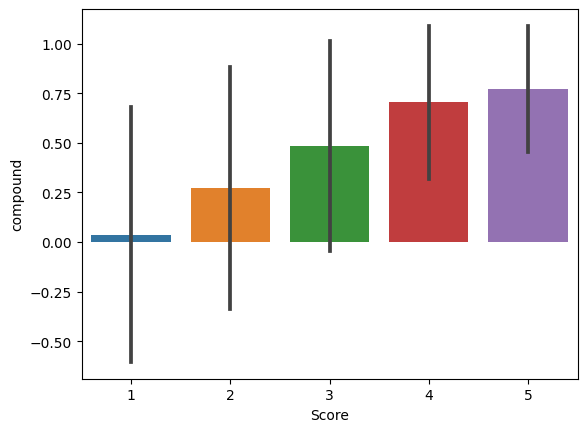

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


ds = sns.barplot(data=result, x='Score', y='compound', ci='sd')


plt.show()


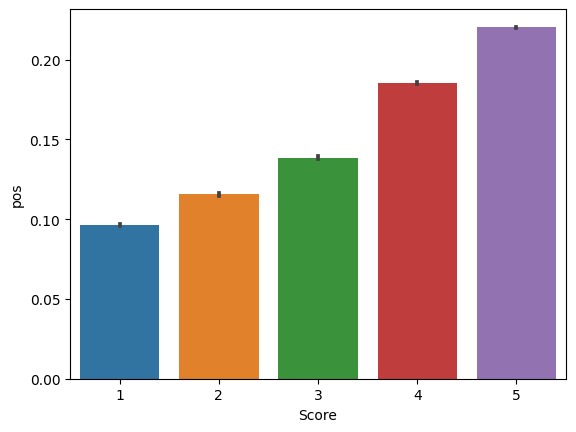

In [10]:
ds = sns.barplot(data = result , x ='Score' , y = "pos")

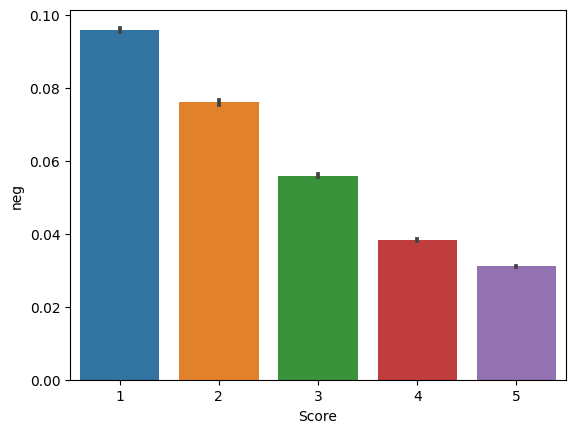

In [11]:
ds = sns.barplot(data = result , x ='Score' , y = "neg")

# code to obtain the polarity of each sentence seperately

In [12]:
exe = data['Text'][50]
exe

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
compound_score = sia.polarity_scores(exe)['compound']

if compound_score >= 0.05:
    sentiment = 'Positive'
elif compound_score <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print(f"Sentiment: {sentiment}")


Sentiment: Negative


# BOX PLOT FOR EACH POLARITY

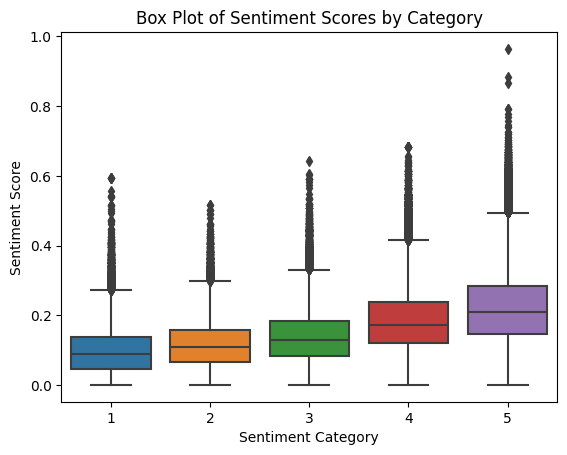

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sentiments' is a list of sentiment scores
sns.boxplot(x='Score', y='pos', data=result)
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.title('Box Plot of Sentiment Scores by Category')
plt.show()


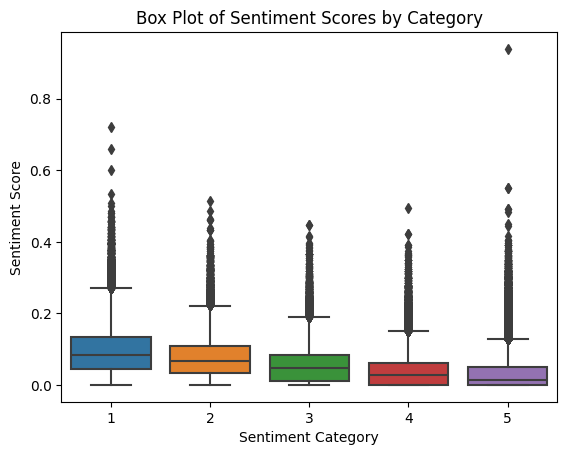

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sentiments' is a list of sentiment scores
sns.boxplot(x='Score', y='neg', data=result)
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.title('Box Plot of Sentiment Scores by Category')
plt.show()


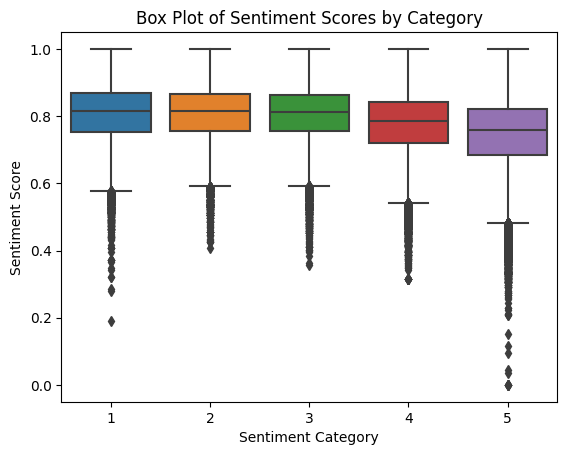

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sentiments' is a list of sentiment scores
sns.boxplot(x='Score', y='neu', data=result)
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.title('Box Plot of Sentiment Scores by Category')
plt.show()


In [17]:
from wordcloud import WordCloud

positive_text = ' '.join(data[data['Score'] == 'positive']['exe'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


KeyError: 'exe'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 399.5, 199.5, -0.5)

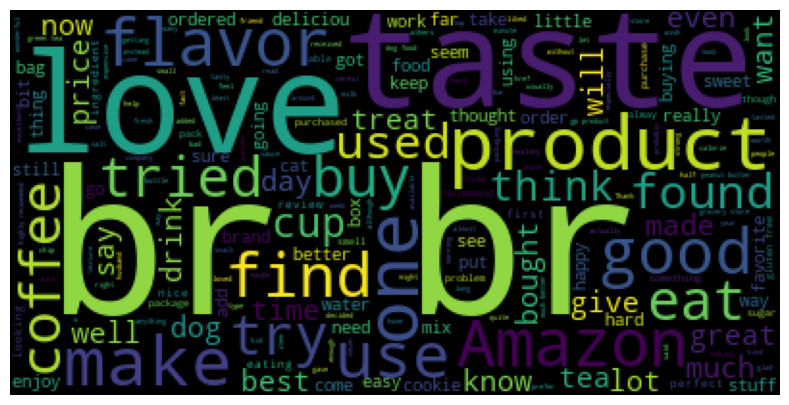

In [20]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud,STOPWORDS
total_neg = " ".join(neg['Text'])
total_neg[0:100]
wordcloud_negative = WordCloud(stopwords = set(STOPWORDS)).generate(total_neg)
plt.figure(figsize = (15,5))
plt.imshow(wordcloud_negative)
plt.axis('off')

In [19]:
neg = result[result['compound'] > 0.05]
neg['Text']

0         I have bought several of the Vitality canned d...
2         This is a confection that has been around a fe...
4         Great taffy at a great price.  There was a wid...
5         I got a wild hair for taffy and ordered this f...
6         This saltwater taffy had great flavors and was...
                                ...                        
568447    Hoping there is no MSG in this, this tastes ex...
568449    Great for sesame chicken..this is a good if no...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 496953, dtype: object